# Insurance Claim Fraud Detection

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 1000
No of Columns: 40


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

In [5]:
df.duplicated('policy_number').sum()

0

In [6]:
df.isin([' ','NA','-']).sum().any()

False

In [7]:
df.isin(['?']).sum().any()

True

In [8]:
df=df.replace('?',np.NaN)

In [9]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
_c39                                   1000           100.0
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
authorities_contacted                    91             9.1
bodily_injuries                           0             0.0
incident_state                            0             0.0
incident_city                             0             0.0
incident_location                         0             0.0
incident_hour_of_the_day                  0             0.0
number_of_vehicles_involved               0             0.0
fraud_reported                            0             0.0
auto_year                                 0             0.0
auto_model                                0             0.0
total_claim_amount                        0             0.0
injury_claim                            

In [10]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [11]:
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)


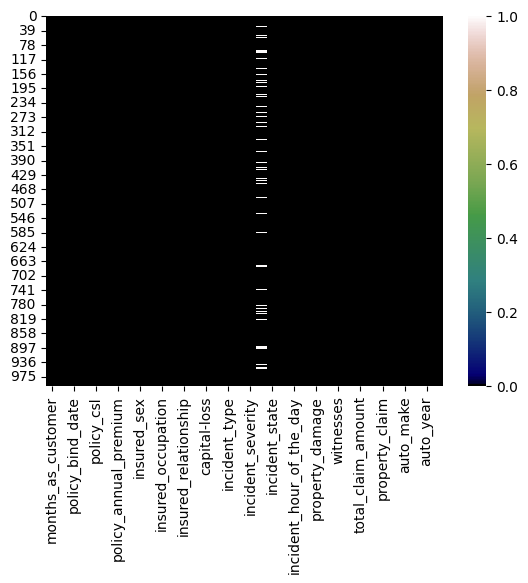

In [12]:
sns.heatmap(df.isnull(),cmap="gist_earth")
plt.show()

In [13]:
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [14]:
df.drop("policy_csl",axis=1,inplace=True)

In [15]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [16]:
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [17]:
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [18]:
df.drop(['incident_year'],axis=1,inplace=True)

In [19]:
df['Automobile_Age']=2015 - df['auto_year']

df.drop("auto_year",axis=1,inplace=True)

In [20]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

In [21]:
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month'], int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']}

In [22]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.000000,203.954000,115.113174,0.000000,115.750000,199.500000,276.250000,479.000000
age,1000.000000,38.948000,9.140287,19.000000,32.000000,38.000000,44.000000,64.000000
policy_deductable,1000.000000,1136.000000,611.864673,500.000000,500.000000,1000.000000,2000.000000,2000.000000
policy_annual_premium,1000.000000,1256.406150,244.167395,433.330000,1089.607500,1257.200000,1415.695000,2047.590000
umbrella_limit,1000.000000,1101000.000000,2297406.598118,-1000000.000000,0.000000,0.000000,0.000000,10000000.000000
capital-gains,1000.000000,25126.100000,27872.187708,0.000000,0.000000,0.000000,51025.000000,100500.000000
capital-loss,1000.000000,-26793.700000,28104.096686,-111100.000000,-51500.000000,-23250.000000,0.000000,0.000000
incident_hour_of_the_day,1000.000000,11.644000,6.951373,0.000000,6.000000,12.000000,17.000000,23.000000
number_of_vehicles_involved,1000.000000,1.839000,1.018880,1.000000,1.000000,1.000000,3.000000,4.000000
bodily_injuries,1000.000000,0.992000,0.820127,0.000000,0.000000,1.000000,2.000000,2.000000


In [23]:
df[Category].describe().T.style.background_gradient(cmap='summer_r')

,count,unique,top,freq
policy_state,1000,3,OH,352
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,1000,3,Rear Collision,470
incident_severity,1000,4,Minor Damage,354
authorities_contacted,909,4,Police,292


In [24]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*100)

policy_state
policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64
insured_sex
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64
insured_education_level
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64
insured_occupation
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64
insured_hobbies
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking      

TypeError: countplot() got multiple values for argument 'data'

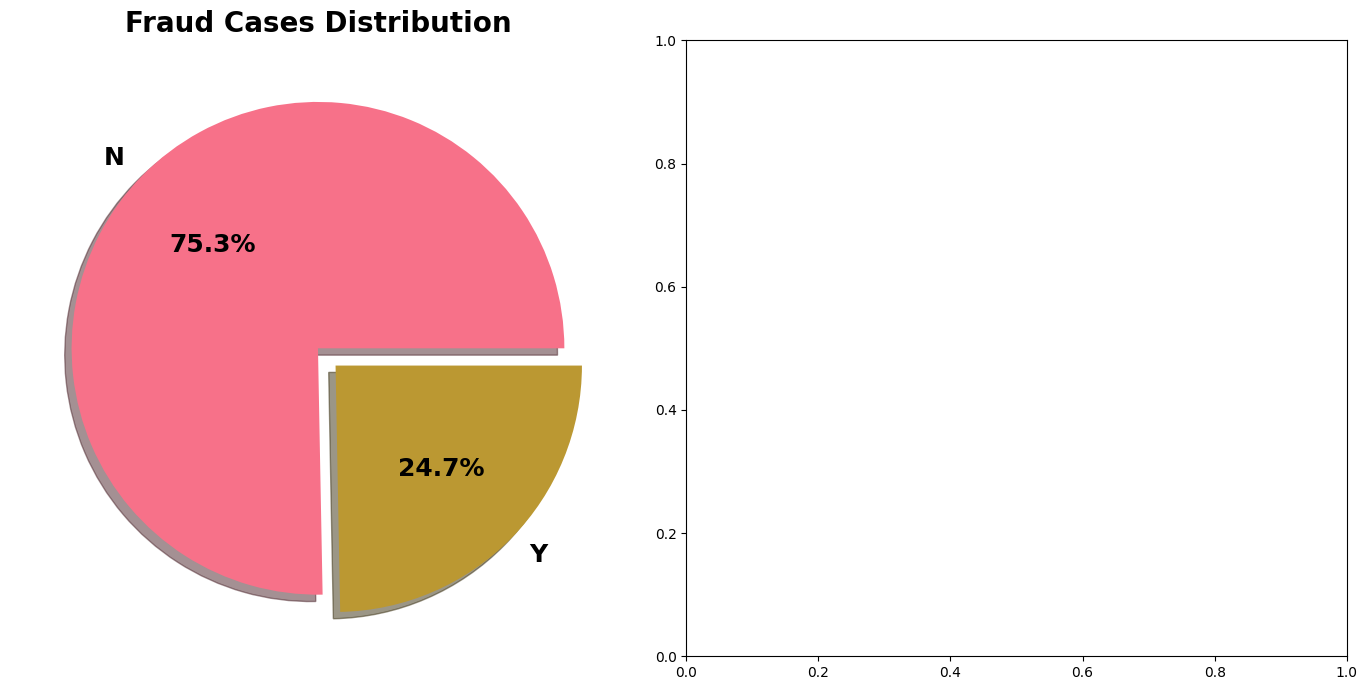

In [25]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(14,7))
df['fraud_reported'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Fraud Cases Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('fraud_reported',data=df,ax=ax[1])
ax[1].set_title('Fraud Cases Count',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Fraud Cases",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

In [26]:
print('Minimum Age :',df.age.min(),'Years')
print('Maximum Age :',df.age.max(),'Years')
print('Average Age :',df.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


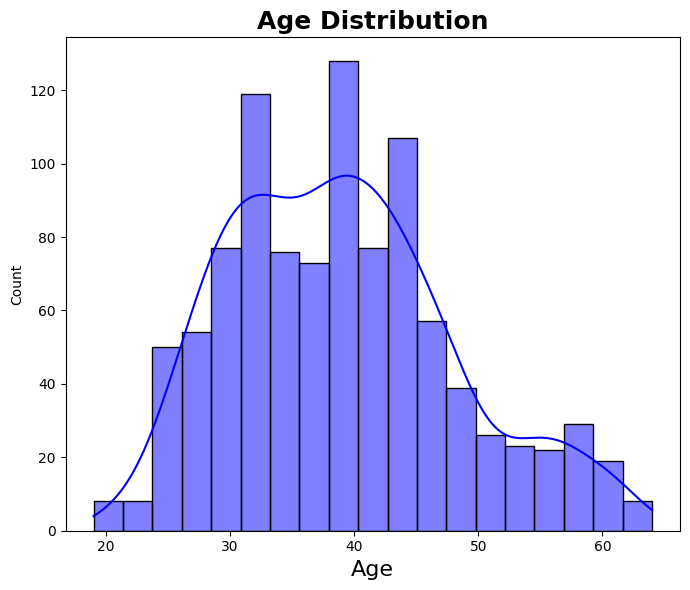

In [27]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

In [28]:
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

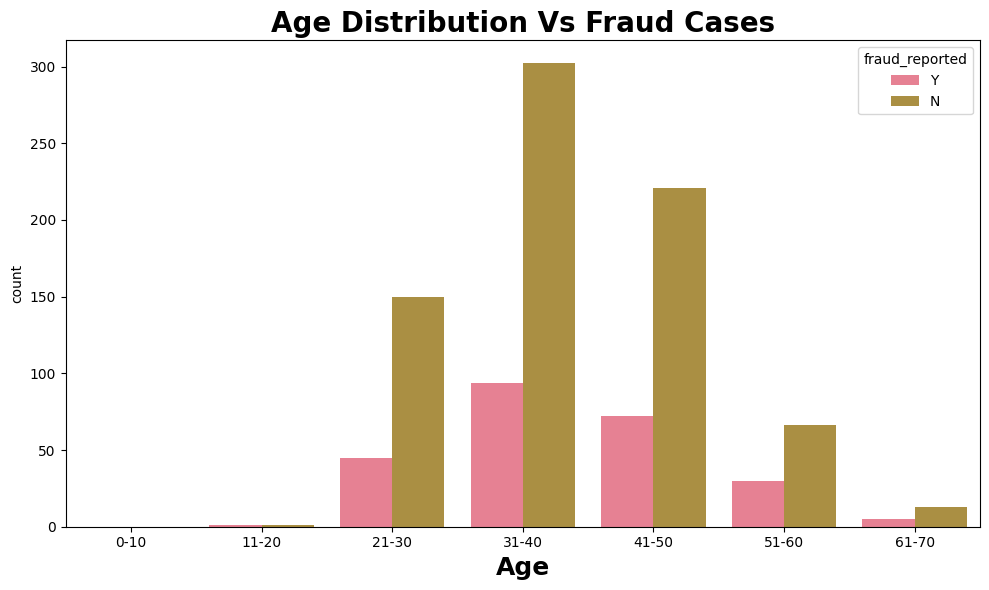

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.age_bins, hue=df.fraud_reported)
plt.xlabel('Age',fontsize=18,fontweight ='bold')
plt.title('Age Distribution Vs Fraud Cases', fontsize=20,fontweight ='bold')
plt.show()

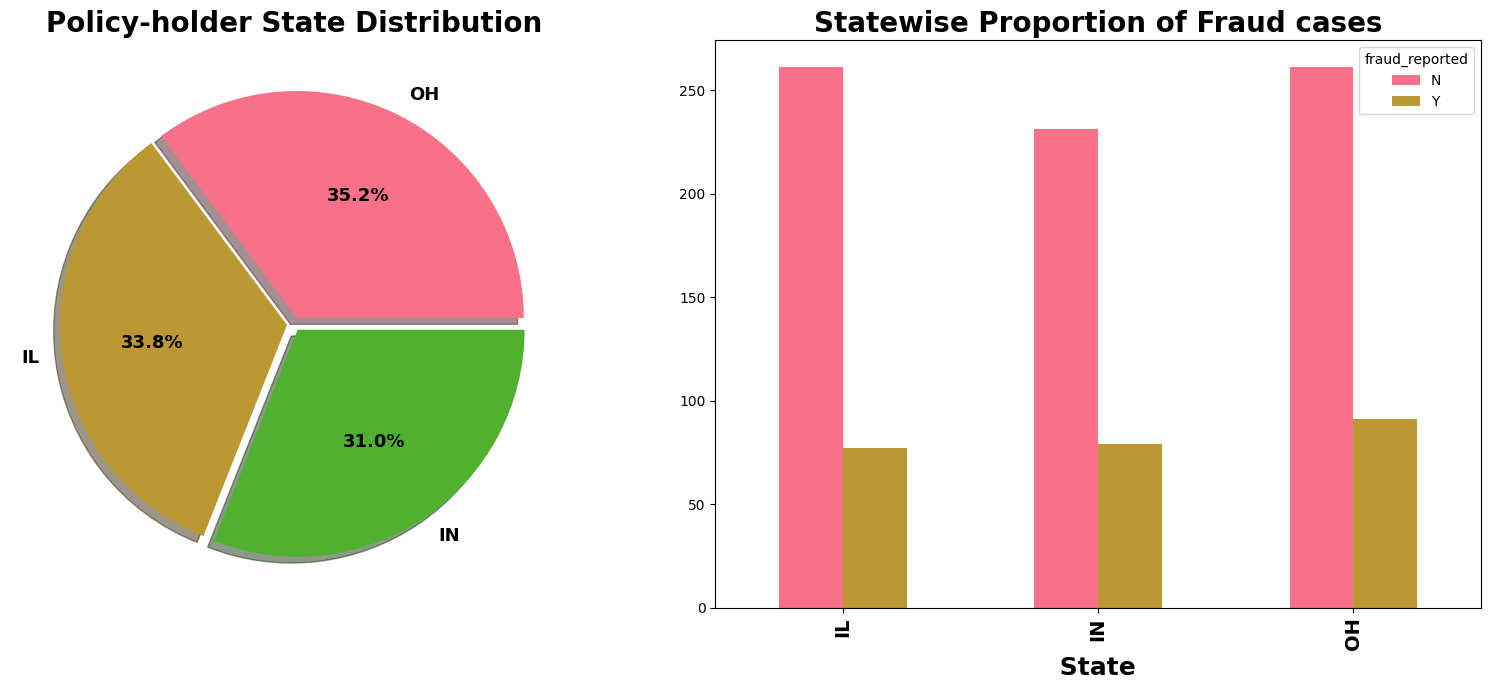

In [30]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder State Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['policy_state'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Statewise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" State ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

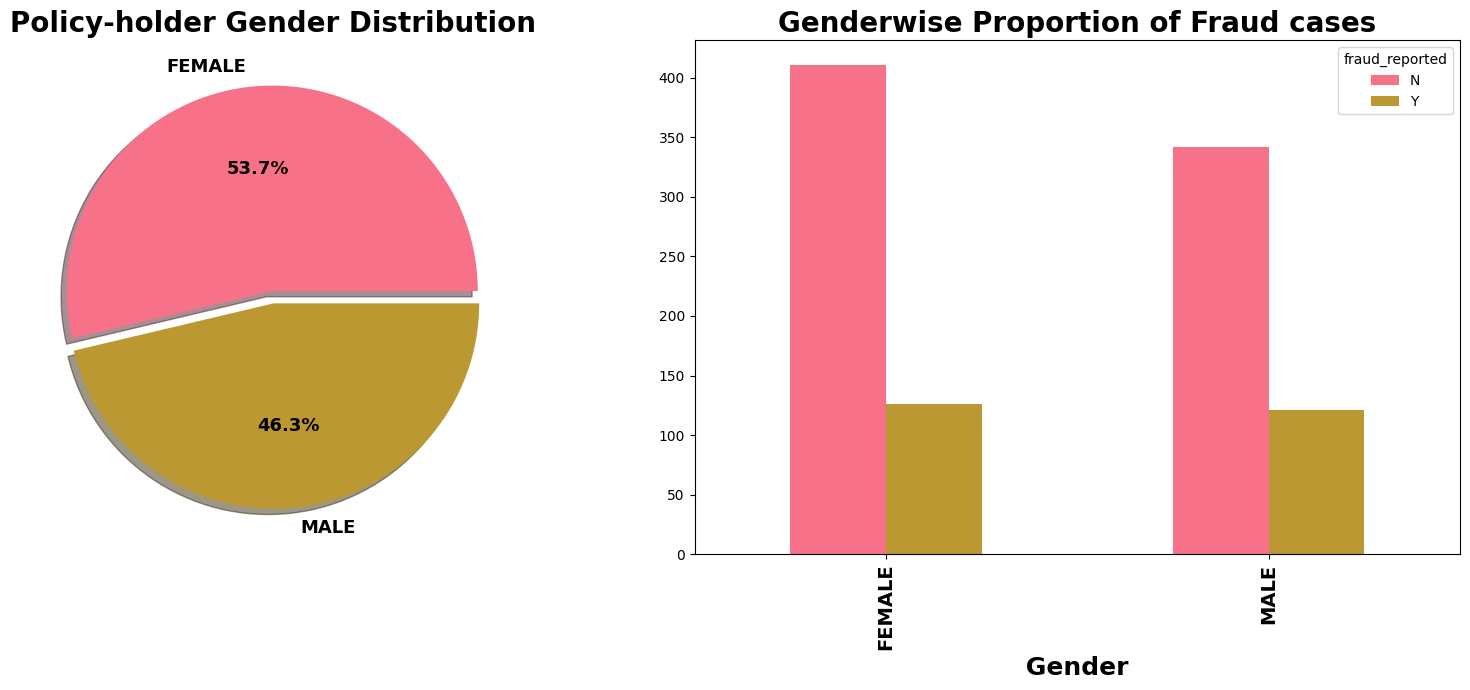

In [31]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_sex'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Gender Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_sex'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Genderwise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Gender ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

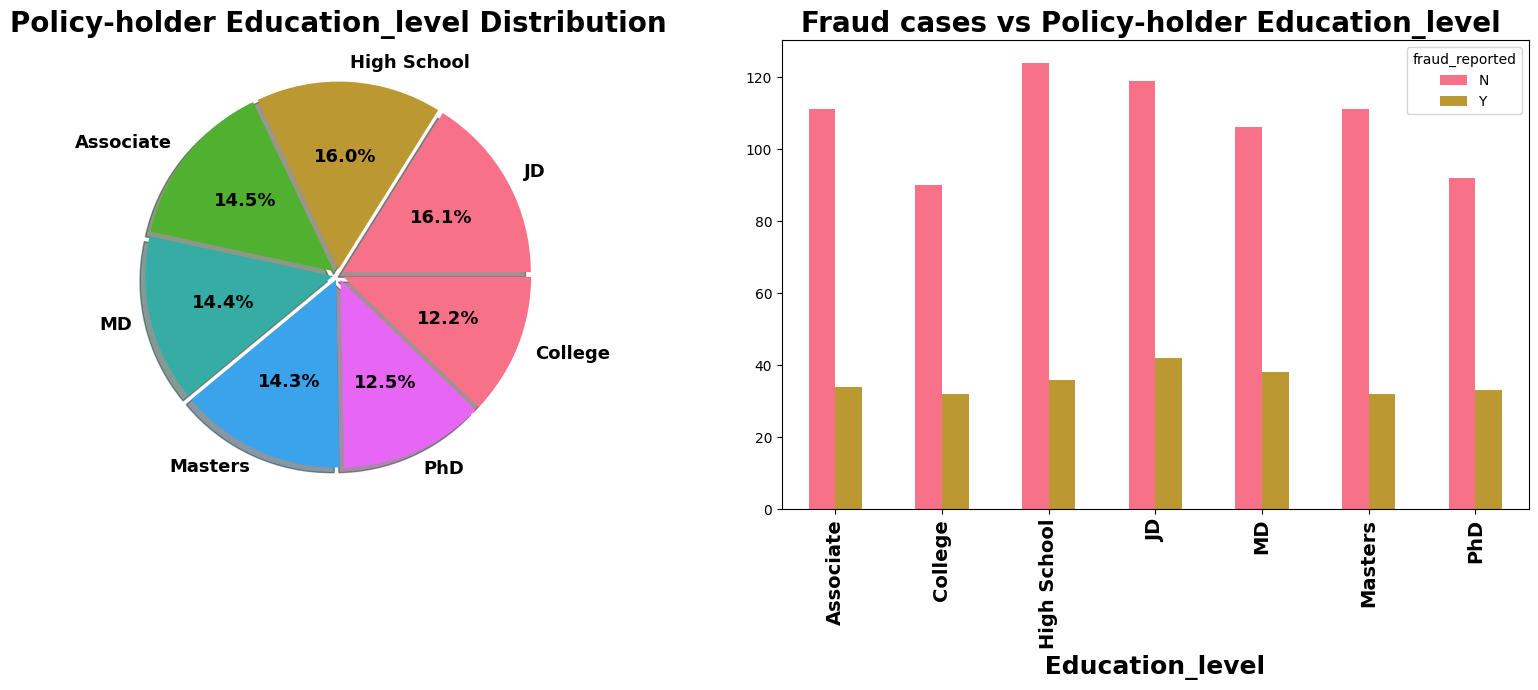

In [32]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_education_level'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Education_level Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_education_level'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases vs Policy-holder Education_level ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Education_level ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [33]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 8)
sns.countplot(df['insured_occupation'], palette = 'gist_earth')
plt.title('Different Types of Occupation of Insured Customers' ,fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

ValueError: could not convert string to float: 'craft-repair'

In [34]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers',fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show() 

ValueError: could not convert string to float: 'sleeping'

In [35]:
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(df['incident_type'], palette = 'Dark2')
plt.title('Different Types of Incidents',fontsize=20,fontweight ='bold')
plt.xlabel('Different Types of Incidents', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

ValueError: could not convert string to float: 'Single Vehicle Collision'

TypeError: countplot() got multiple values for argument 'data'

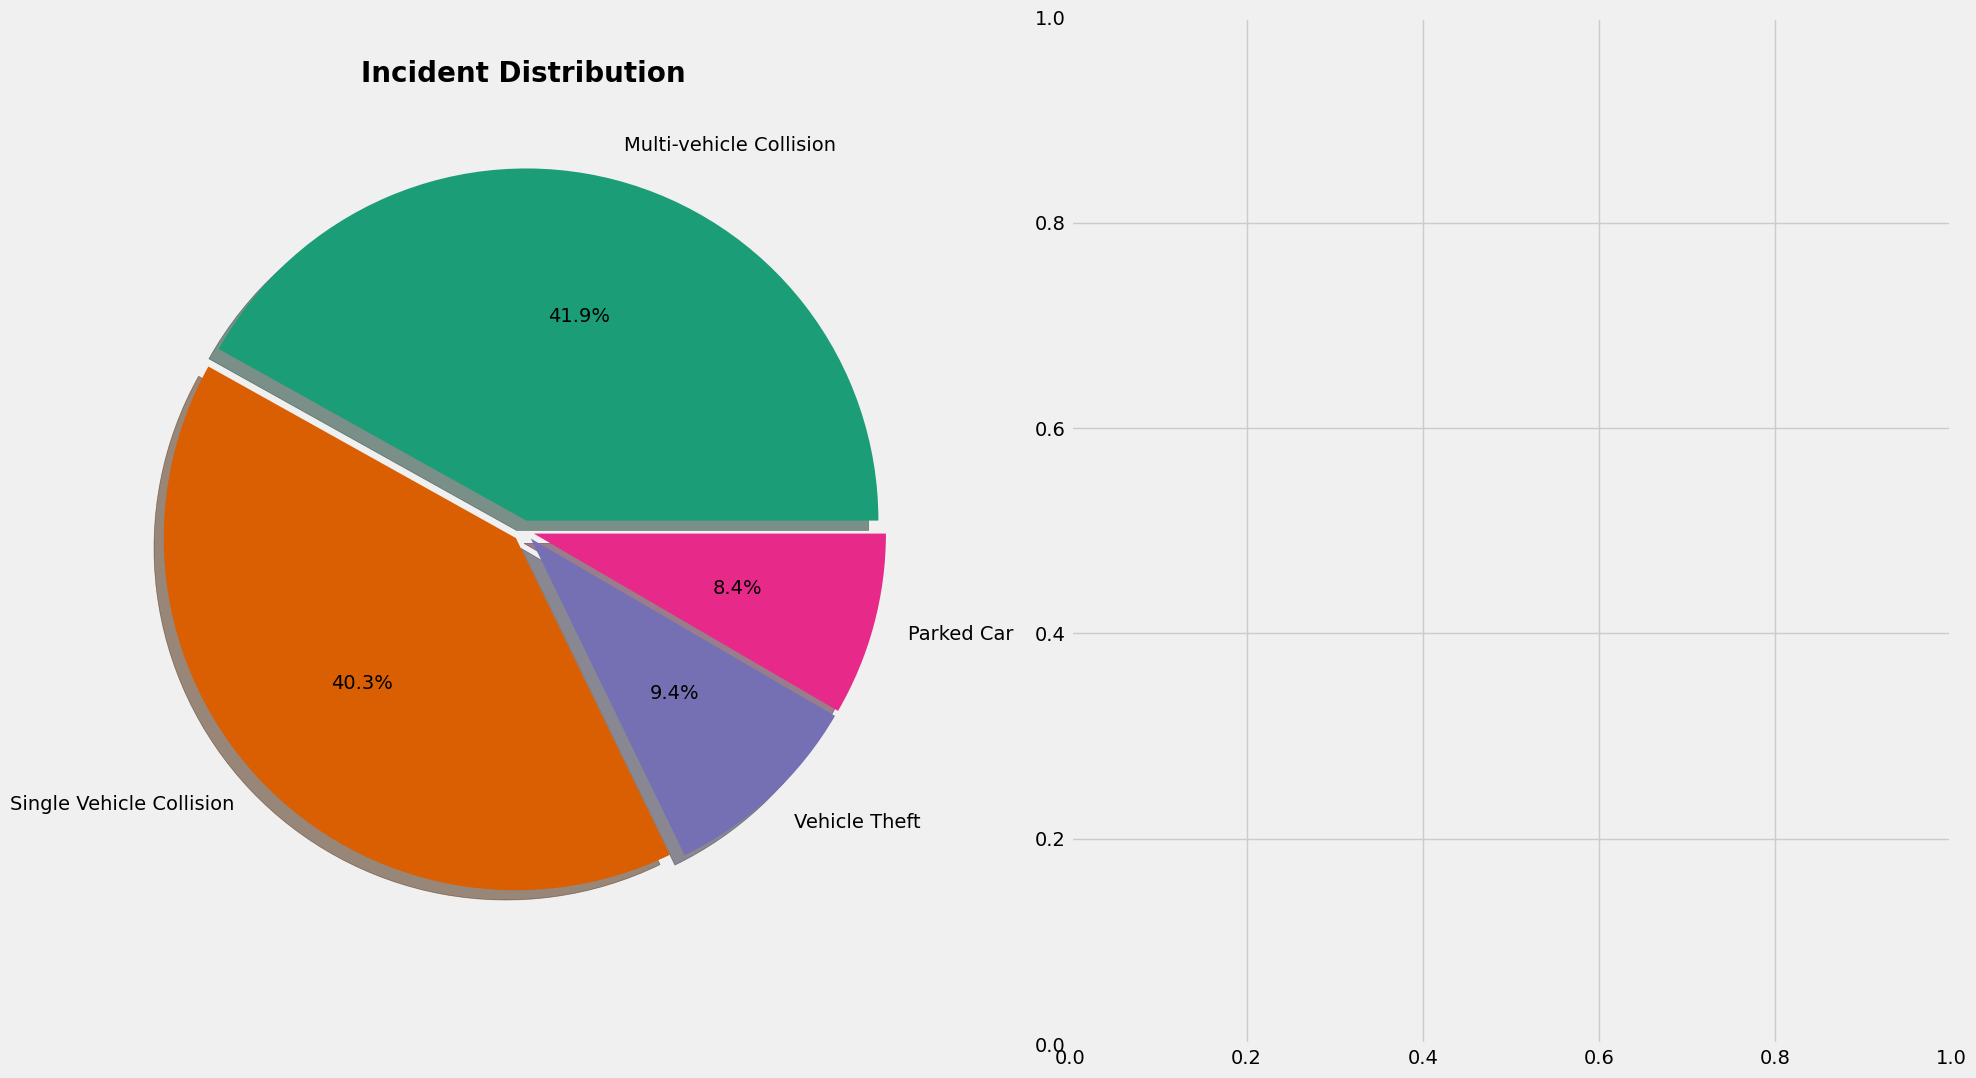

In [36]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Dark2')
f,ax=plt.subplots(1,2,figsize=(20,11))
df['incident_type'].value_counts().plot.pie(explode=[0.03,.03,.03,.03],autopct='%3.1f%%',
                                          textprops ={ 'fontsize':14}, ax=ax[0],shadow=True)
ax[0].set_title('Incident Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('incident_type',data=df,ax=ax[1])
ax[1].set_title('Different Types of Incidents',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("incident_type",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,rotation=30,fontweight ='bold')
plt.tight_layout()
plt.show()

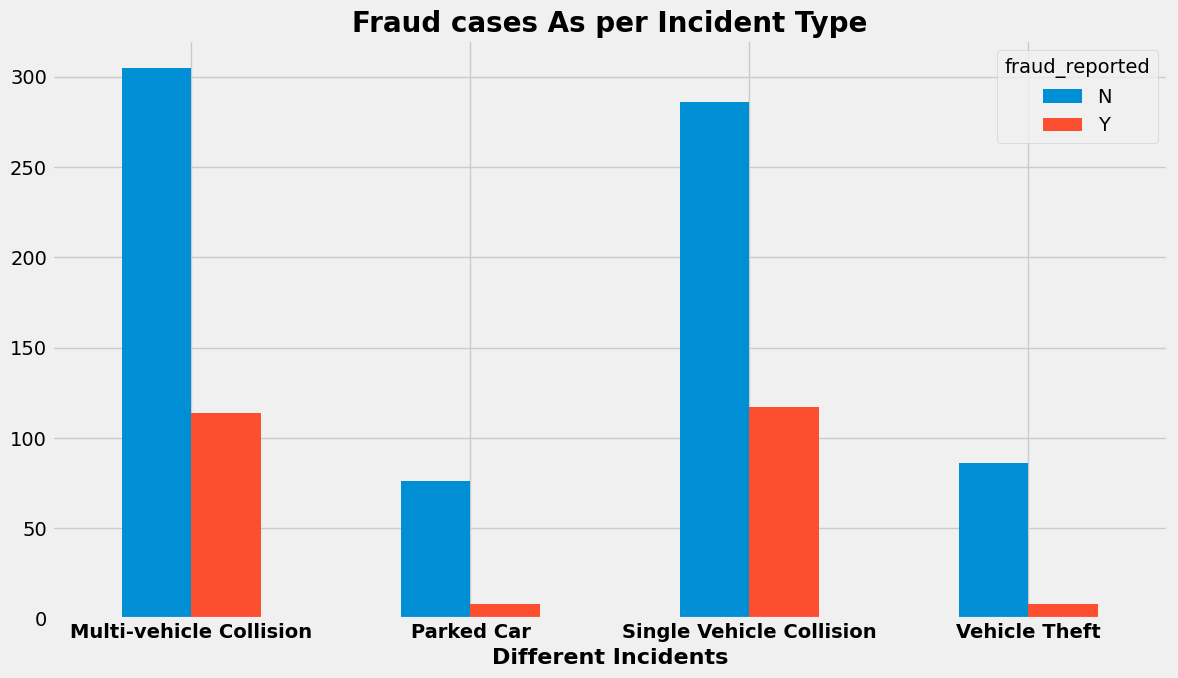

In [37]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,7)
table = pd.crosstab(df['incident_type'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases As per Incident Type',fontsize=20,fontweight ='bold')
plt.xlabel('Different Incidents', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

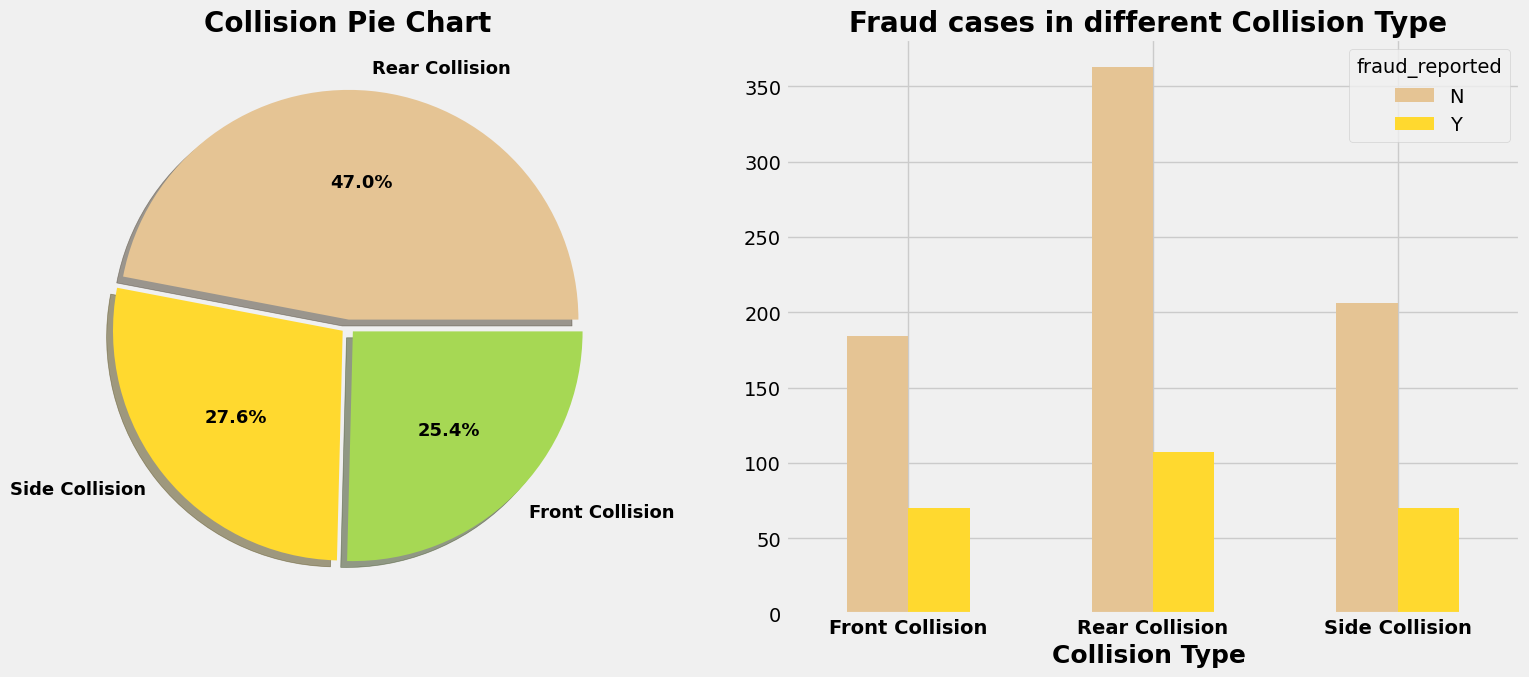

In [38]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['collision_type'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['collision_type'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases in different Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

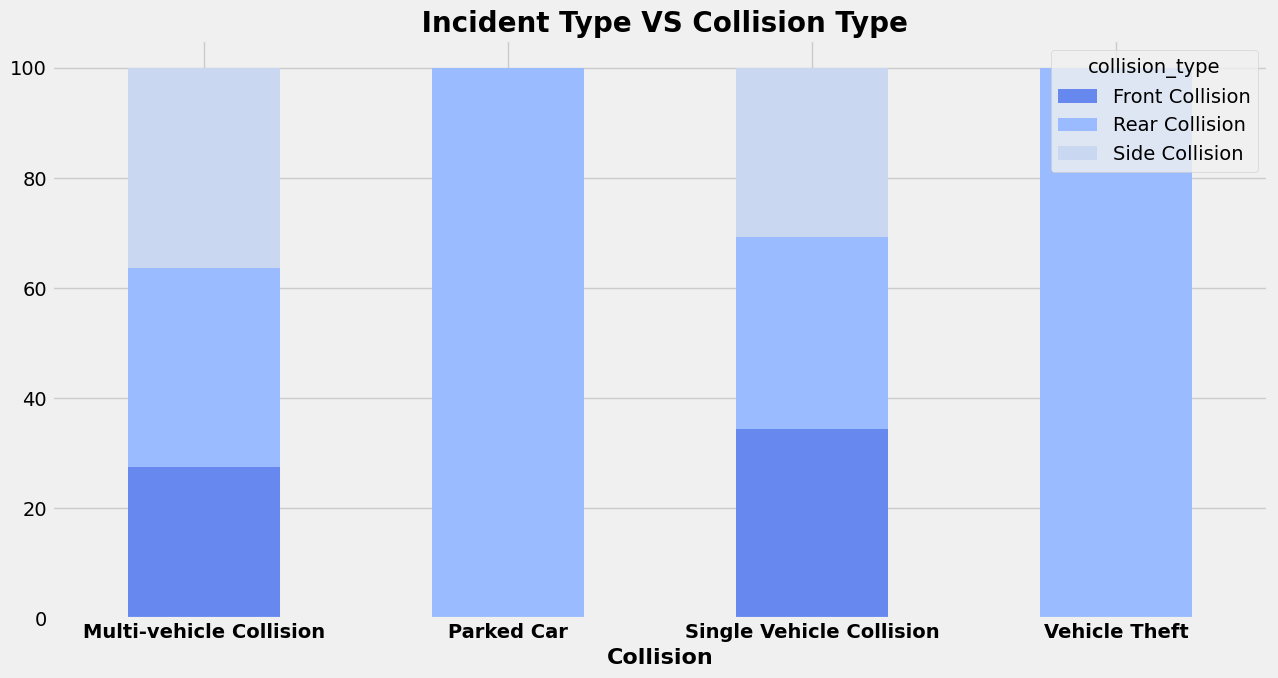

In [39]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('coolwarm')
table = pd.crosstab(df['incident_type'], df['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True)
plt.title(' Incident Type VS Collision Type',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

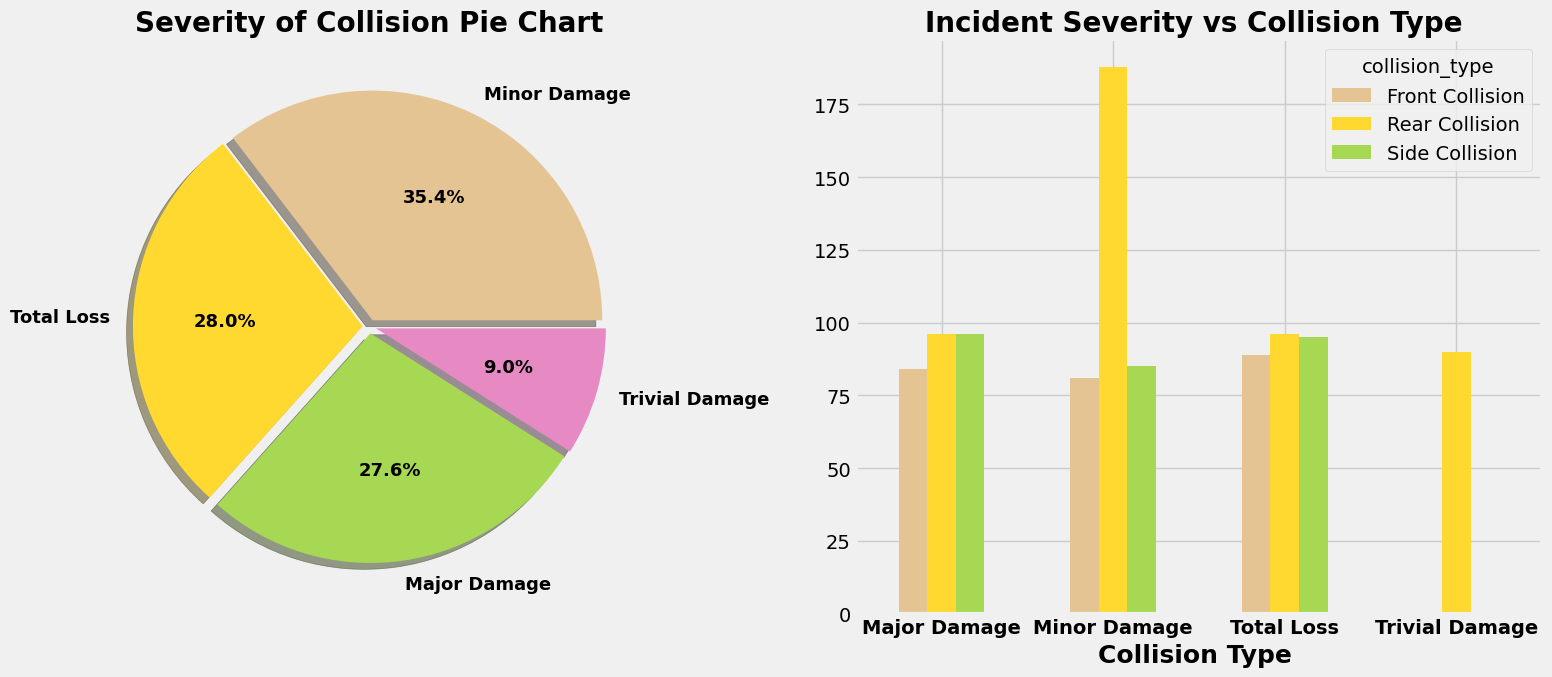

In [40]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['incident_severity'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Severity of Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['incident_severity'], df['collision_type'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Incident Severity vs Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [41]:
pd.crosstab(df['incident_type'], df['incident_severity']).style.background_gradient(cmap='summer_r')

incident_severity,Major Damage,Minor Damage,Total Loss,Trivial Damage
incident_type,,,,
Multi-vehicle Collision,144,130,145,0
Parked Car,0,42,0,42
Single Vehicle Collision,132,136,135,0
Vehicle Theft,0,46,0,48


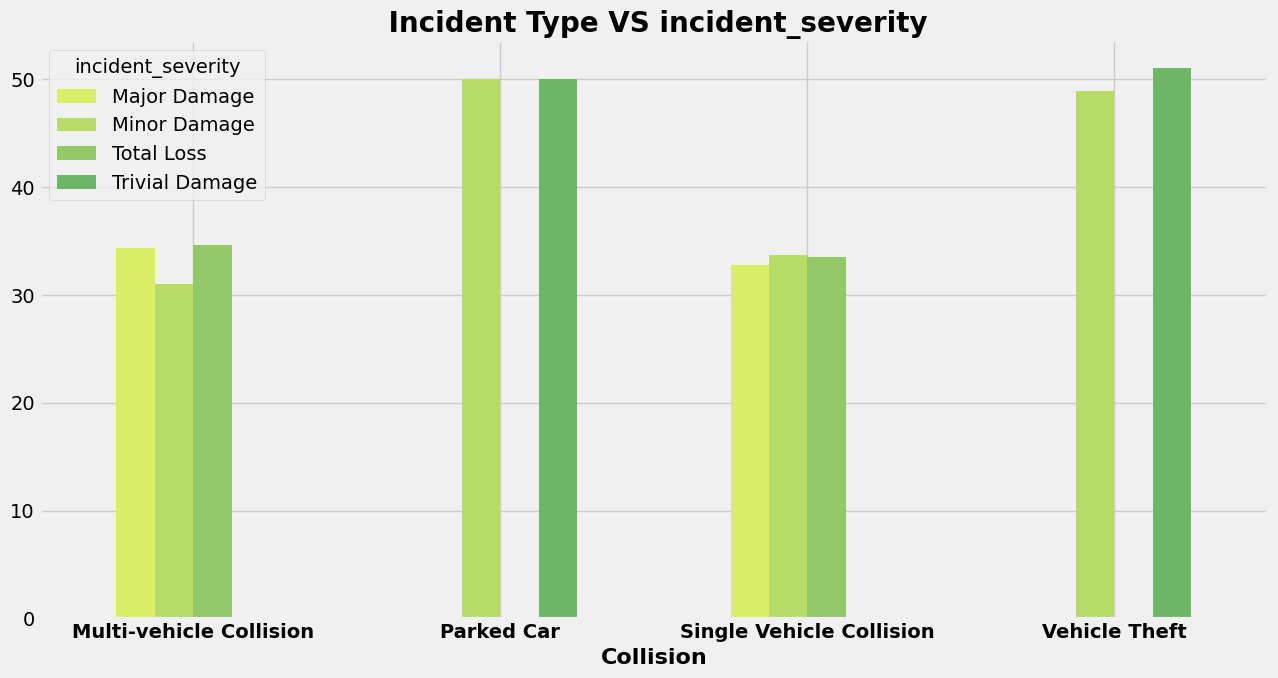

In [42]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('summer_r')
table = pd.crosstab(df['incident_type'], df['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.title(' Incident Type VS incident_severity',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

In [43]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.boxenplot(df['incident_type'], df['vehicle_claim'], palette = 'magma')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Type', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

TypeError: boxenplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [44]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.stripplot(df['property_damage'], df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Property Damage', fontsize=16,fontweight='bold')
plt.ylabel('Property claim', fontsize=16,fontweight='bold')
plt.show()

TypeError: stripplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [45]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.swarmplot(df['policy_state'], df['total_claim_amount'], palette = 'copper')
plt.title('Total Claim Amount in Differnt State',fontsize=20,fontweight ='bold')
plt.xlabel('State', fontsize=16,fontweight='bold')
plt.ylabel('Total claim Amount', fontsize=16,fontweight='bold')
plt.show()

TypeError: swarmplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [46]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(df['auto_make'], df['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [47]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(df['policy_annual_premium'], df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

In [48]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,8)
sns.violinplot(df['incident_severity'], df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Incident Severity VS Total Claim Amount',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Severity', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

TypeError: violinplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

In [49]:
pd.set_option('display.max_columns', None)
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age,age_bins
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,Y,250,500,17,10,2014,25,1,11,41-50
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,Y,250,500,27,6,2006,21,1,8,41-50
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N,100,300,6,9,2000,22,2,8,21-30
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y,250,500,25,5,1990,10,1,1,41-50
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,NaN,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,N,500,1000,6,6,2014,17,2,6,41-50


In [50]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age,age_bins
0,328,48,2,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,3,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,1,1,2,17,10,2014,25,1,11,41-50
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,3,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,1,1,2,27,6,2006,21,1,8,41-50
2,134,29,2,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,3,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,0,0,1,6,9,2000,22,2,8,21-30
3,256,41,0,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,3,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,1,1,2,25,5,1990,10,1,1,41-50
4,228,44,0,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,4,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,0,2,0,6,6,2014,17,2,6,41-50


In [52]:
df.columns.to_series().groupby(df.dtypes).groups

TypeError: '<' not supported between instances of 'CategoricalDtype' and 'numpy.dtypes.Float64DType'

In [53]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

In [54]:
len(Numerical)

21

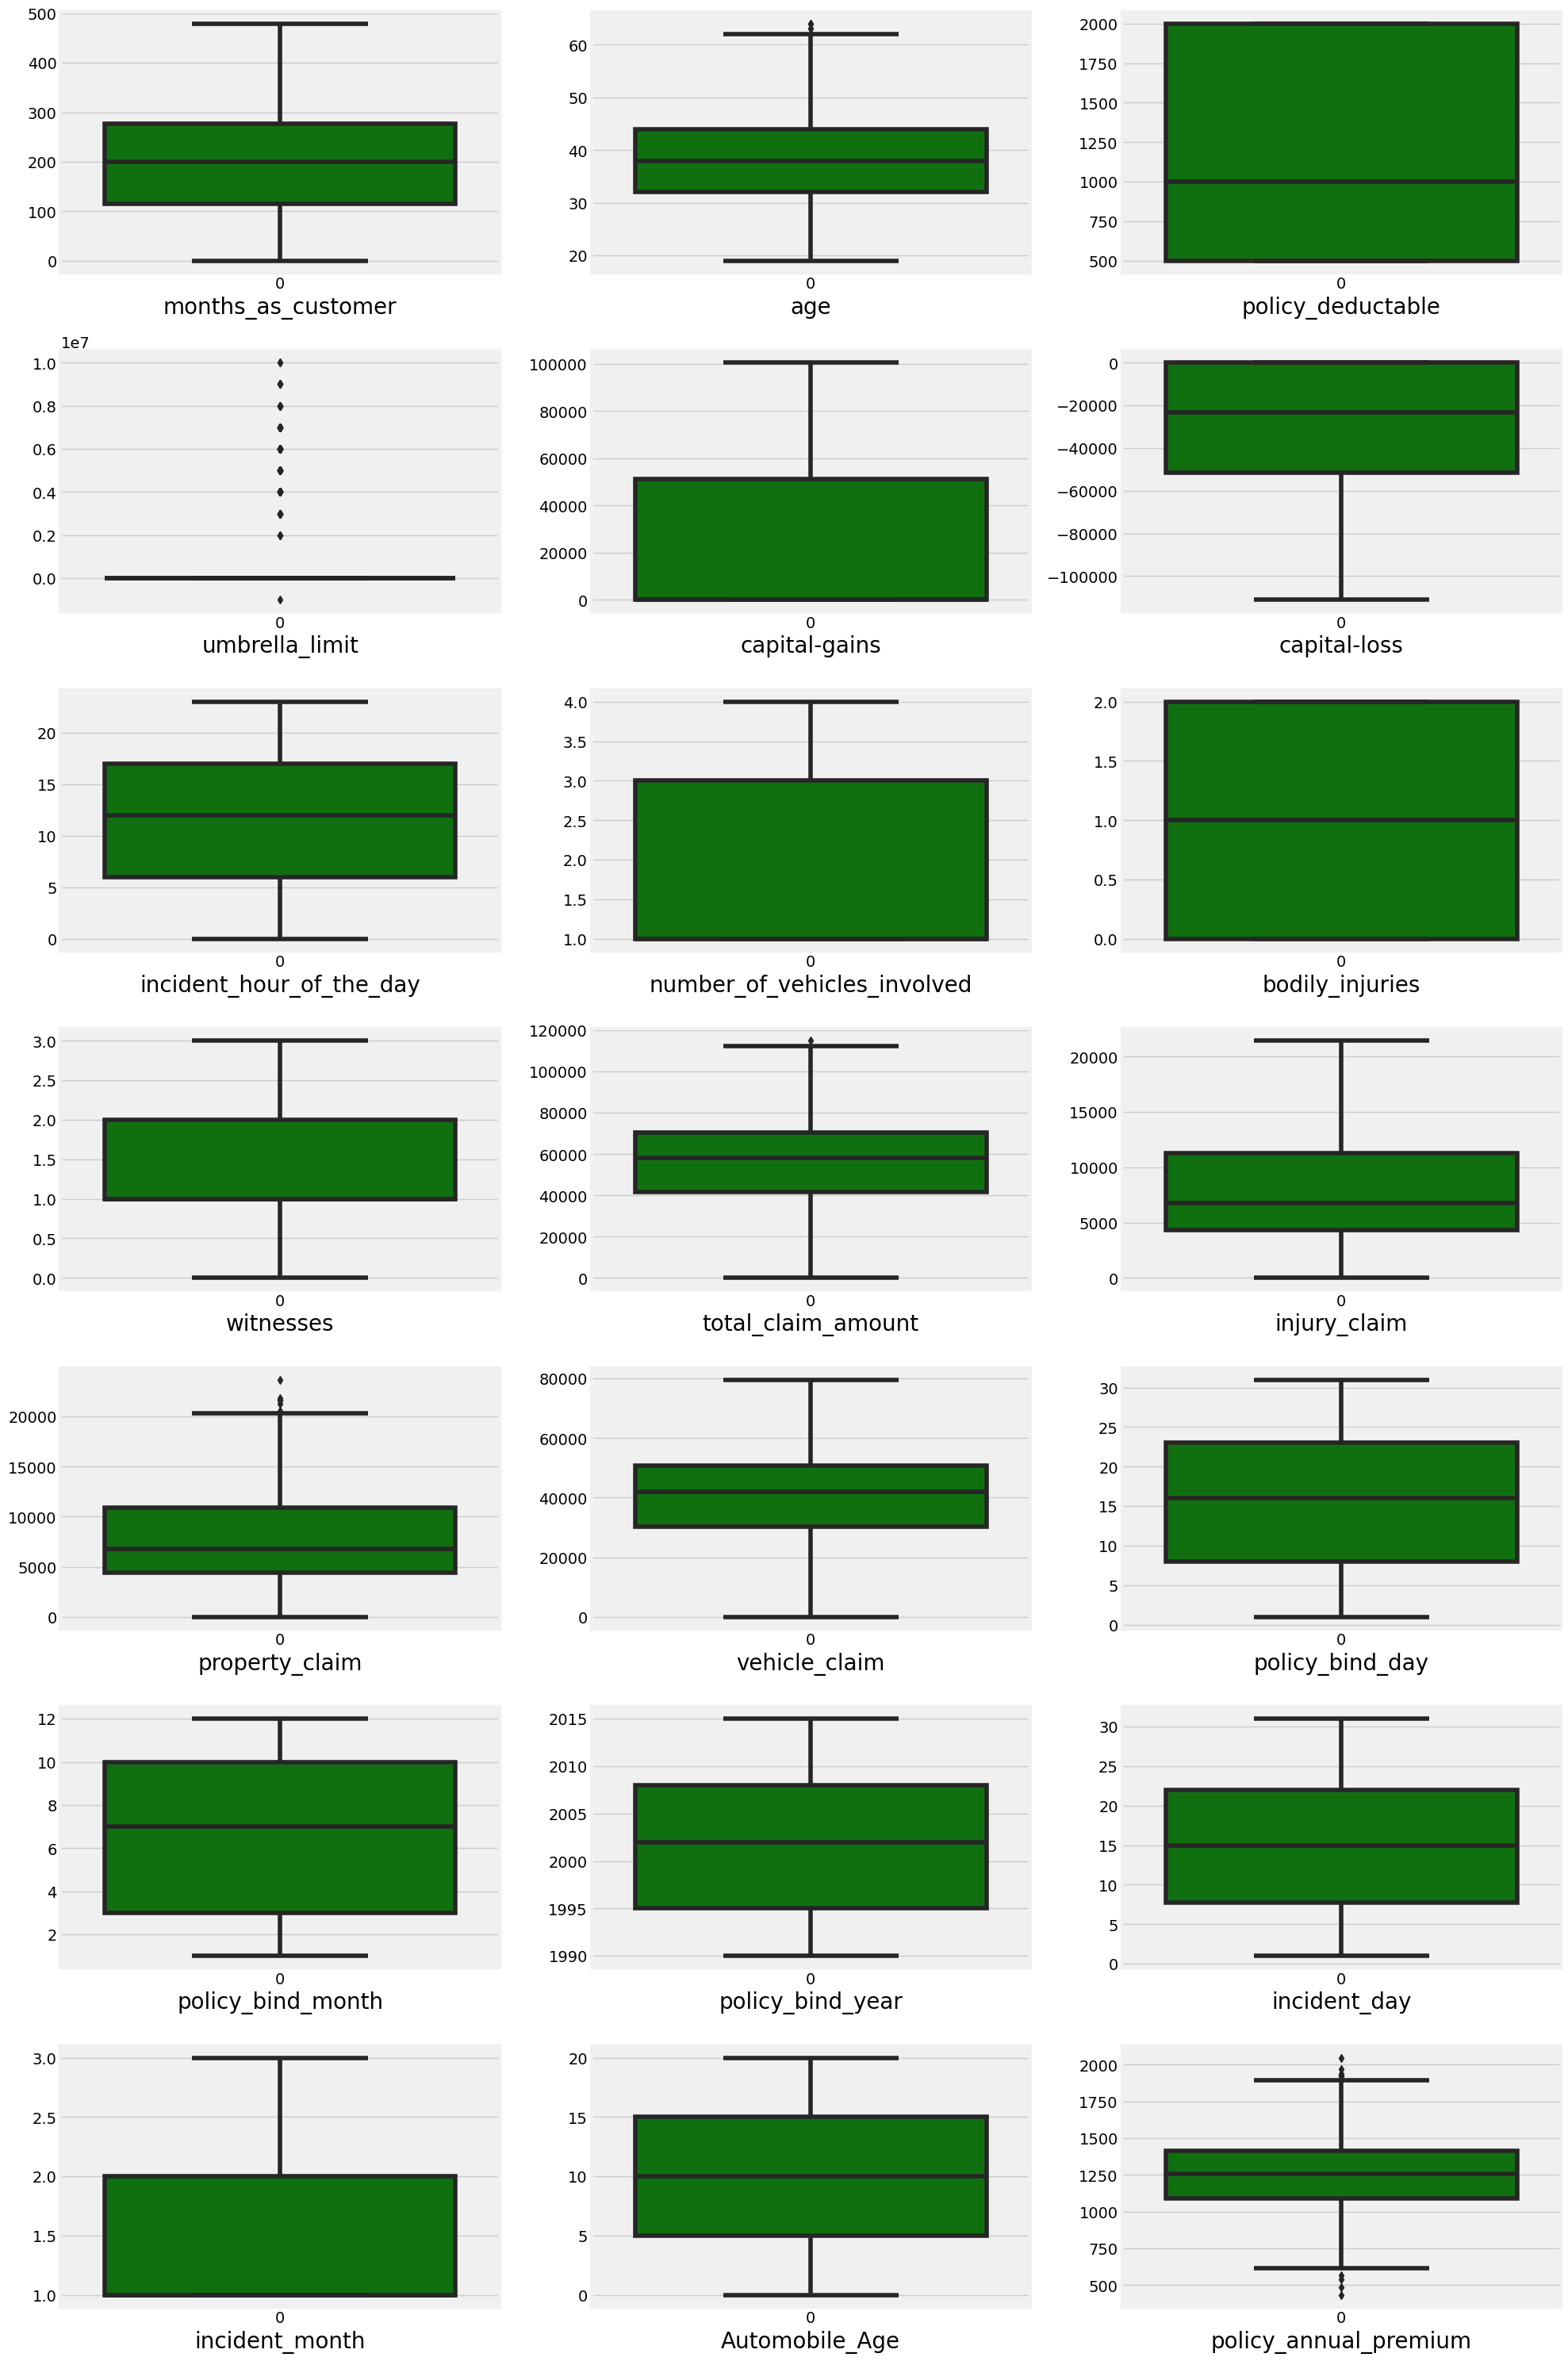

In [55]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [56]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

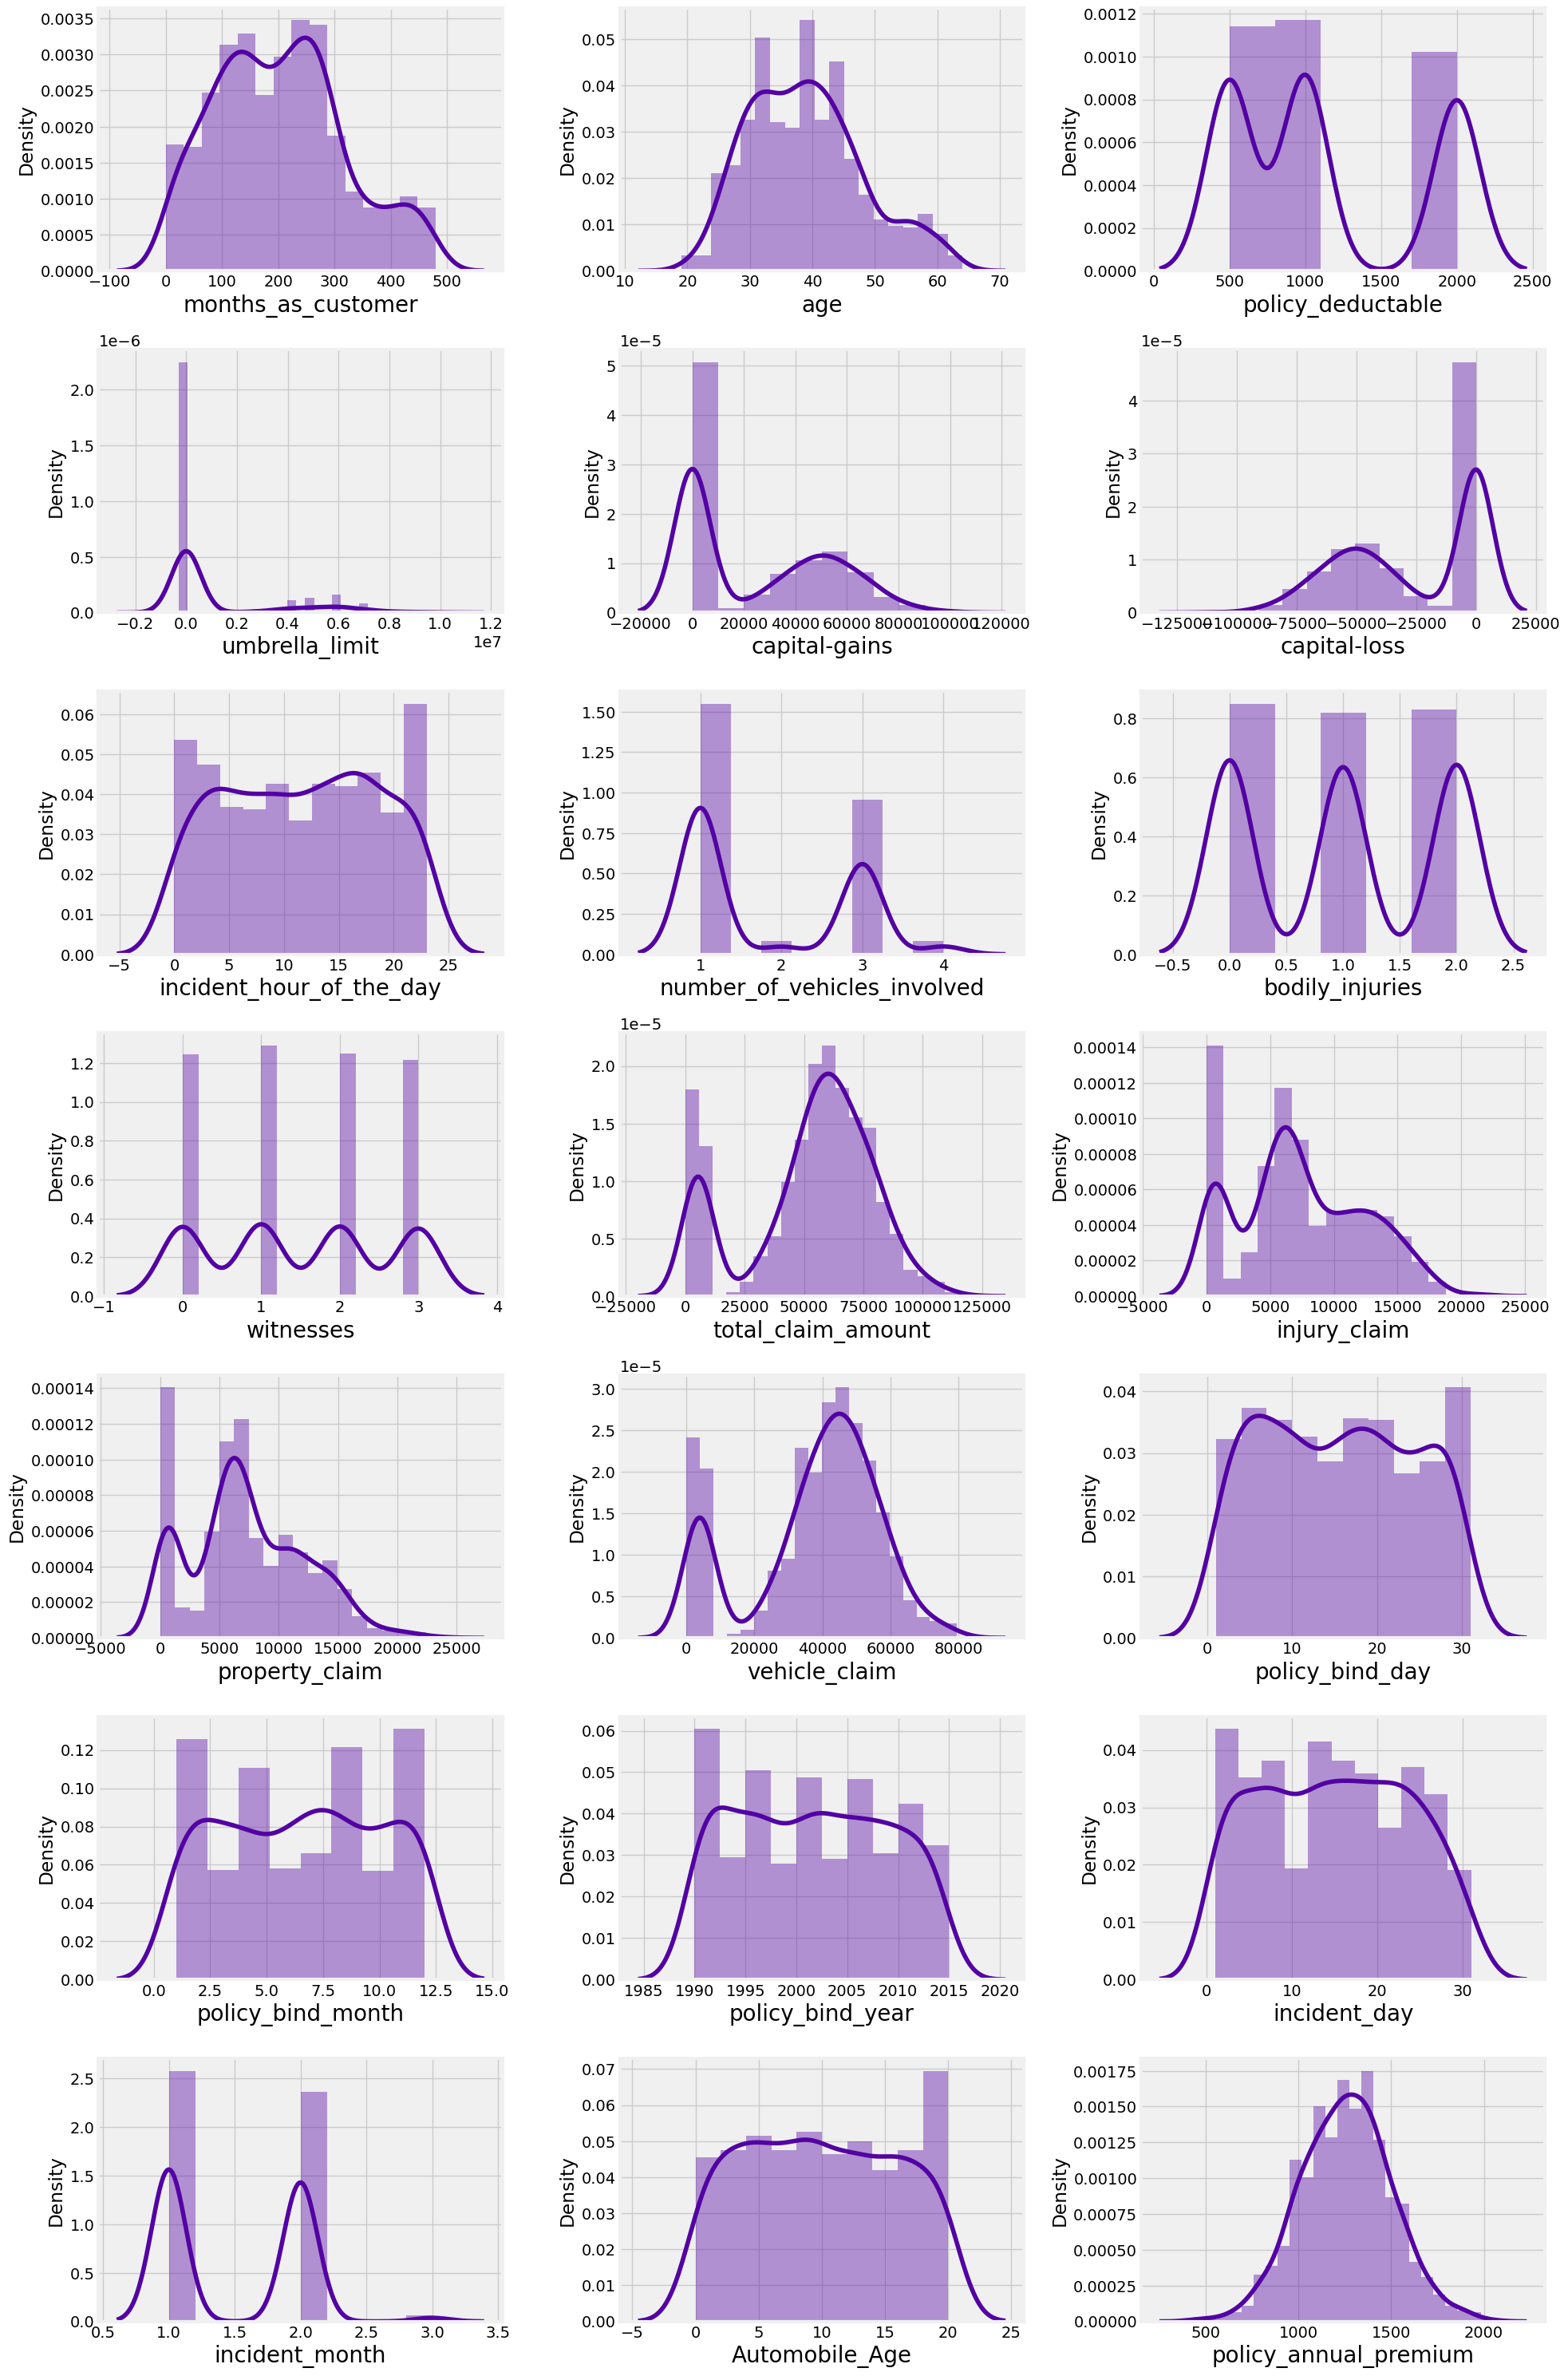

In [57]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [58]:
df[Numerical].skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
policy_bind_day                0.053237
policy_bind_month             -0.016994
policy_bind_year               0.052511
incident_day                   0.039711
incident_month                 0.267378
Automobile_Age                 0.048289
policy_annual_premium          0.004402
dtype: float64

In [59]:
skew=['total_claim_amount','vehicle_claim']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)

In [60]:
df[skew].skew()

total_claim_amount   -0.510354
vehicle_claim        -0.522718
dtype: float64

In [61]:
df.corr()

ValueError: could not convert string to float: '41-50'

In [62]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

ValueError: could not convert string to float: '41-50'

<Figure size 3000x2000 with 0 Axes>

In [63]:
plt.figure(figsize=(22,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable Fraud_reported',fontsize=20,fontweight='bold')
plt.show()

ValueError: could not convert string to float: '41-50'

<Figure size 2200x1000 with 0 Axes>

In [64]:
df.fraud_reported.value_counts()

fraud_reported
0    753
1    247
Name: count, dtype: int64

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

In [67]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

ValueError: could not convert string to float: '41-50'

In [68]:
Y.value_counts()

fraud_reported
0    753
1    247
Name: count, dtype: int64

In [69]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

ValueError: could not convert string to float: '41-50'

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

NameError: name 'X_scale' is not defined

In [71]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

NameError: name 'X_scale' is not defined

In [72]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

NameError: name 'X_scale' is not defined

In [73]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

NameError: name 'x_new' is not defined

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

NameError: name 'principle_x' is not defined

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

NameError: name 'principle_x' is not defined

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=9, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

NameError: name 'principle_x' is not defined

In [78]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train) 
    y_pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(Y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

NameError: name 'X_train' is not defined

ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

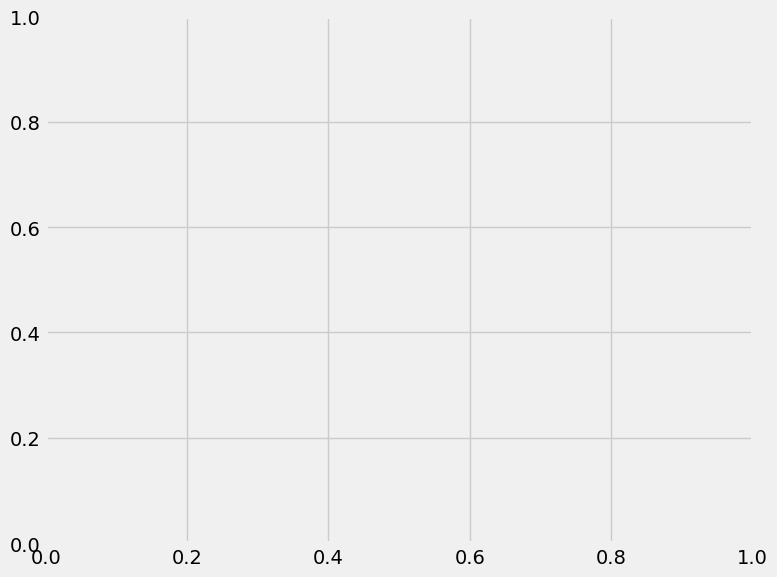

In [79]:
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='red', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [80]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

NameError: name 'X_train' is not defined

In [81]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')

NameError: name 'principle_x' is not defined

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [84]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

NameError: name 'X_train' is not defined

In [85]:
GCV.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [86]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 200, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

NameError: name 'X_train' is not defined

In [87]:
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

NameError: name 'Y_test' is not defined

In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\__init__.py)

In [89]:
import joblib
joblib.dump(Final_mod,'Insurance_claims_CONCLUDE.pkl')

['Insurance_claims_CONCLUDE.pkl']

In [90]:
prediction = Final_mod.predict(X_test)

NameError: name 'X_test' is not defined

In [91]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

NameError: name 'Y_test' is not defined